# ETF Investing and Index Replication / Tracking

## S&P500 Index and ETFs - Full Replication

The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the stock performance of __500 large companies__ listed on stock exchanges in the __United States__. It is one of the __most commonly followed equity indices__. As of December 31, 2020, more than $5.4 trillion was invested in assets tied to the performance of the index.

The S&P 500 index is a free-float weighted/__capitalization-weighted index__. As of August 31, 2022, the nine largest companies on the list of S&P 500 companies accounted for 27.8% of the market capitalization of the index and were, in order of highest to lowest weighting: Apple, Microsoft, Alphabet (including both class A & C shares), Amazon.com, Tesla, Berkshire Hathaway, UnitedHealth Group, Johnson & Johnson and ExxonMobil. (Source: Wikipedia)

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
index = "^GSPC"
index_tr = "^SP500TR"
etf = "SPY" #SPDR® S&P 500

Link to ETF:

https://www.ssga.com/us/en/intermediary/etfs/funds/spdr-sp-500-etf-trust-spy

In [ ]:
df = yf.download([index, index_tr, etf], end = "2022-11-30")
df

In [ ]:
df.dropna(inplace = True)

In [ ]:
prices = df.Close.copy()
prices

In [ ]:
prices["SPYTR"] = df[("Adj Close", "SPY")]

In [ ]:
prices

In [ ]:
norm = prices / prices.iloc[0]
norm

In [ ]:
norm[["SPY", "^GSPC"]].plot(figsize = (12, 8))
plt.title("S&P500: ETF Price vs. Price Return Index", fontsize = 15)
plt.show()

In [ ]:
norm.loc["2022", ["SPYTR", "^SP500TR"]].plot(figsize = (12, 8))
plt.title("S&P500: ETF TR vs. Total Return Index", fontsize = 15)
plt.show()

In [ ]:
returns = prices.pct_change()
returns

In [ ]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
summary = ann_risk_return(returns)
summary

__-> Total Return Difference due to ETF Fees__ (deducted from Dividends)

## Active Return and Active Risk (Tracking Error)

__How to measure Tracking Quality:__

- __Active Return__: __Return Differences__ between an instrument/portfolio and the Index
- __Tracking Error__ (Tracking Risk / Active Risk): __Volatility of Active Returns__ (standard deviation)
- Perfect Tracking: __Zero__ Active Return and Tracking Error

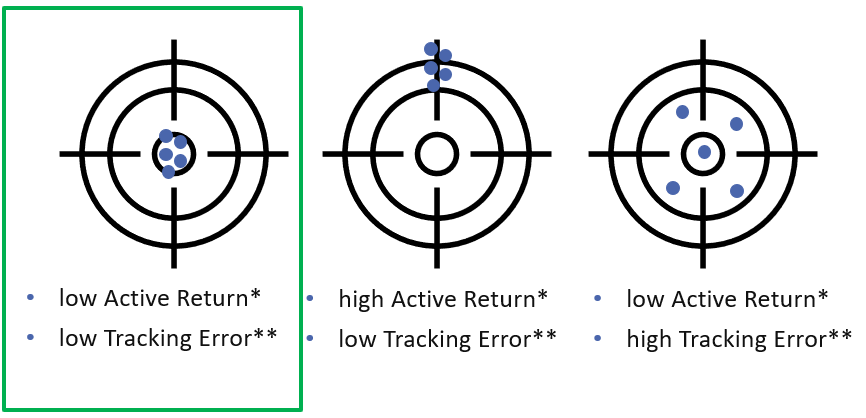

In [ ]:
returns

In [ ]:
price_ret = returns[["^GSPC", "SPY"]].copy()
price_ret

In [ ]:
total_ret = returns[["^SP500TR", "SPYTR"]].copy()
total_ret

In [ ]:
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
tracking(price_ret, "^GSPC") # price return

In [ ]:
tracking(total_ret, "^SP500TR") # total return

-> Active Return and Tracking Error of Index is zero (by definition). 

-> Tracking Error of ETF close to zero (Full Replication)

__-> Negative Active Return (-0.14%) due to ETF Fees__ (deducted from Dividends)

__Note__: The Tracking Error of the ETF is mainly due to the __Premium/Discount Mispricing of ETF shares__ relative to its Net Asset Value (NAV). The Tracking Error between the ETF´s NAV and the Index should be zero. 

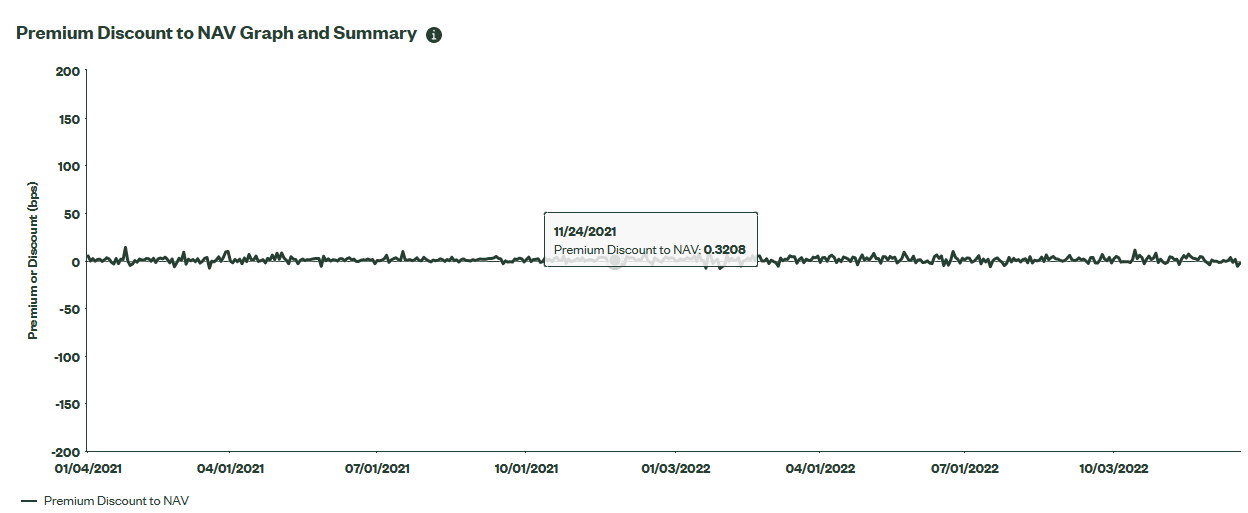

## Russell 3000 and ETFs - Representative Sampling

The Russell 3000 Index is a __capitalization-weighted__ stock market index that seeks to be a benchmark of the __entire U.S stock market__. It measures the performance of the __3,000 largest publicly held companies__ incorporated in America as measured by total market capitalization, and represents approximately __97%__ of the American public equity market. 

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
index = "^RUA"
index_tr = "^RUATR"
etf = "IWV" #iShares Russell 3000 ETF

https://www.ishares.com/us/products/239714/ishares-russell-3000-etf

In [ ]:
df = yf.download([index, etf])
df

In [ ]:
df.dropna(inplace = True)
df

In [ ]:
prices = df.Close.copy()
prices

In [ ]:
norm = prices / prices.iloc[0]
norm

In [ ]:
norm.plot(figsize = (12, 8))
plt.title("Russell 3000: ETF Price vs. Price Return Index", fontsize = 15)
plt.show()

In [ ]:
norm.loc["2022"].plot(figsize = (12, 8))
plt.title("Russell 3000: ETF Price vs. Price Return Index", fontsize = 15)
plt.show()

In [ ]:
returns = prices.pct_change()
returns

In [ ]:
def ann_risk_return(returns_df): # assumes simple returns as input
    summary = pd.DataFrame(index = returns_df.columns)
    summary["ann. Risk"] = returns_df.std() * np.sqrt(252)
    log_returns = np.log(returns_df + 1)
    summary["CAGR"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
summary = ann_risk_return(returns)
summary

In [ ]:
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
tracking(returns, "^RUA")

## ETF Trading with the Interactive Brokers (IBKR) API

__Please run the following code only with your Paper Trading Account!!!__

__Check the Regular Trading Hours!!!__

In [ ]:
from ib_insync import *
util.startLoop() 

In [ ]:
ib = IB()

In [ ]:
ib.connect()

In [ ]:
symbol = "SPY" #SPDR® S&P 500

In [ ]:
contract = Stock(symbol, "SMART", "USD")
contract

In [ ]:
cds = ib.reqContractDetails(contract)
cds

In [ ]:
len(cds)

In [ ]:
ib.qualifyContracts(contract)

In [ ]:
data = ib.reqMktData(contract)
data

In [ ]:
ib.reqMarketDataType(3)

In [ ]:
data.marketPrice()

In [ ]:
order = MarketOrder(action = "BUY", totalQuantity = 1)
order

In [ ]:
trade = ib.placeOrder(contract, order)
while not trade.isDone():
    ib.waitOnUpdate()

In [ ]:
trade

In [ ]:
trade.orderStatus.status

In [ ]:
trade.orderStatus.avgFillPrice

In [ ]:
pos = ib.positions()
pos

In [ ]:
df = util.df(pos)
df

In [ ]:
df["symbol"] = df.contract.apply(lambda x: x.symbol)
df["conID"] = df.contract.apply(lambda x: x.conId)
df

In [ ]:
ib.disconnect()

## Index Tracking with Optimization (Part 1) - The S&P 500 Constituents

__Goal__: S&P500 Index Tracking with __Optimization__ <br>
__Data Requirements__: __Historical Prices__ and __Market Caps__ for all 503 Constituents

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

__List with all 503 Constituents__

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

In [ ]:
df = pd.read_html(url)[0]
df

In [ ]:
df.info()

In [ ]:
df.rename(columns = {"Date first added":"Date_Added"}, inplace = True)

In [ ]:
df.Date_Added = pd.to_datetime(df.Date_Added, errors = "coerce")

In [ ]:
df.Date_Added.sort_values(ascending = False).head(50)

In [ ]:
symbols = list(df.Symbol)
symbols

In [ ]:
symbols = [symbol.replace(".", "-") for symbol in symbols]
symbols

In [ ]:
symbols.append("^GSPC")

In [ ]:
symbols

__Historical Prices__

In [ ]:
df = yf.download(symbols)
df

In [ ]:
df = df.loc["2019":].copy()
df

In [ ]:
#df.to_csv("SP500_Const.csv")

In [ ]:
const = pd.read_csv("SP500_Const.csv", header =[0,1], index_col = 0, parse_dates = [0])
const

__Data Cleaning and Preparation__

In [ ]:
close = const.loc["2019":, "Close"]
close

In [ ]:
close.isna().sum().sort_values().value_counts()

In [ ]:
close.dropna(axis = 1, thresh = len(close) - 1, inplace = True) # only [1] NA per Symbol allowed
close

In [ ]:
close.fillna(method = "ffill", inplace = True)
close

In [ ]:
close.isna().sum().sort_values().value_counts()

In [ ]:
index = "^GSPC"

In [ ]:
const = close.columns.drop([index])
const

In [ ]:
norm = close.div(close.iloc[0])
norm

In [ ]:
returns = close.pct_change()
returns

## Index Tracking with Optimization (Part 2) - Historical Market Caps

__All US Listings__ (taken from https://www.nasdaq.com/market-activity/stocks/screener) 

In [ ]:
listings = pd.read_csv("nasdaq_listings.csv", index_col = "Symbol")
listings

In [ ]:
listings.index = listings.index.str.replace("/", "-")

In [ ]:
listings = listings.loc[const].copy()
listings

In [ ]:
listings.info()

In [ ]:
listings[listings["Market Cap"].isna()]

In [ ]:
to_remove = listings[listings["Market Cap"].isna()].index[0]
to_remove

In [ ]:
listings.drop(to_remove, inplace = True)

In [ ]:
const

In [ ]:
const = const.drop(to_remove)
len(const)

In [ ]:
listings

In [ ]:
listings["Price"] = pd.to_numeric(listings["Last Sale"].str.replace("$", "", regex = False))
listings 

In [ ]:
listings["Shares"] = listings["Market Cap"] / listings.Price
listings

In [ ]:
shares = listings.Shares
shares

In [ ]:
mcap = close[const].mul(shares) # approximation!
mcap

In [ ]:
mcap.iloc[-1].sort_values(ascending = False)

In [ ]:
total_mcap = mcap.sum(axis = "columns") # total market cap
total_mcap

In [ ]:
total_mcap.plot(figsize = (12, 8))
plt.title("Total Market Cap S&P 500", fontsize = 15)
plt.show()

## Index Tracking with Optimization (Part 3) - Tracking Quality of single Stocks

In [ ]:
returns

In [ ]:
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
tracking = tracking(returns, "^GSPC")
tracking

In [ ]:
tracking.sort_values("TrackingError")

In [ ]:
norm[["^GSPC", "BRK-B", "PCG"]].plot(figsize = (12, 8))
plt.show()

##  Index Tracking with Optimization (Part 4) - a random Tracking Portfolio

In [ ]:
n = len(const)
n

In [ ]:
i = 50 # number of stock in tracking portfolio
i

In [ ]:
np.random.seed(123)
tracking_stocks = np.random.choice(a = const, size = i, replace = False) # random sampling
tracking_stocks

In [ ]:
weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
weights_VWI

In [ ]:
tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
tracking_returns

In [ ]:
tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
tracking_error

In [ ]:
sims = 1000 # 1000 Simulations with 50 random stocks

In [ ]:
np.random.seed(123)
trerrors = []
for sim in range(sims):
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)
    weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
    tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
    tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
    trerrors.append(tracking_error)
av_te = np.mean(trerrors)

In [ ]:
av_te # sample size = 50

## Index Tracking with Optimization (Part 5) - Does Sample Size matter?

Goal: Perform same analysis for different Sample Sizes (1, 11, 21, 31...)

In [ ]:
n

In [ ]:
list(range(1, n + 1, 10))

In [ ]:
sims = 100 # 100 random sims per size

In [ ]:
np.random.seed(123)
av_tres = []
for i in range(1, n + 1, 10):
    trerrors = []
    for sim in range(sims):
        tracking_stocks = np.random.choice(a = const, size = i, replace = False)
        weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
        tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
        tracking_error = (tracking_returns - returns[index]).std() * np.sqrt(252)
        trerrors.append(tracking_error)
    av_tres.append(np.mean(trerrors))

In [ ]:
av_tres

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(range(1, n + 1, 10), av_tres)
plt.title("Tracking Portfolio Size vs. Tracking Error", fontsize = 15)
plt.xlabel("Portfolio Size", fontsize = 12)
plt.ylabel("Tracking Error", fontsize = 12)
plt.show()

- The larger the Sample, the better the Tracking Quality (minimizing Tracking Error)
- Marginal Benefit decreases

## Index Tracking with Optimization (Part 6): an Example 

In [ ]:
n = len(const)
n

Target: Expected Tracking Error < 5%

In [ ]:
i = 110
i

In [ ]:
sims = 10000 # 10,000 random portfolios -> find the best tracking one!

In [ ]:
np.random.seed(123)
min_te = 1
tstocks = None
tportfolio = None
for sim in range(sims):
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)
    weights_VWI = mcap[tracking_stocks].div(mcap[tracking_stocks].sum(axis = "columns"), axis = "rows")
    tracking_returns = returns[tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
    active_returns = tracking_returns - returns[index]
    tracking_error = active_returns.std() * np.sqrt(252)
    tracking_portfolio = tracking_returns.add(1).cumprod() # normalized prices
    if tracking_error < min_te: # minimize TE
        min_te = tracking_error
        tstocks = tracking_stocks
        tportfolio = tracking_portfolio

In [ ]:
min_te

In [ ]:
tstocks

In [ ]:
tportfolio

In [ ]:
tportfolio.name = "Tracking_Portfolio"

In [ ]:
tportfolio.plot(figsize = (12, 8))
norm[index].plot()
plt.legend()
plt.show()

In [ ]:
norm["Tracking_Portfolio"] = tportfolio

In [ ]:
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
tracking(norm.pct_change(), index)

We __optimized with historical data__ and tested tracking quality __"in-sample"__ on the same 
historical data! <br>
Problem: We __overestimate Tracking Quality__!<br>
__Better__: Testing Tracking Quality on future __"out-sample"__ data ("Forward Testing")

## Optimization and "out-sample" Testing (Part 1)

Splitting full Time Period into an __Optimization Period__ and a __Testing Period__

In [ ]:
opt_start = "2019"
opt_end = "2021-06"

In [ ]:
test_start = "2021-07"
test_end = "2022"

In [ ]:
mcap.loc[opt_start:opt_end]

__Optimization (Jan 2019 - Jun 2021)__

In [ ]:
i = 110

In [ ]:
start = opt_start
end = opt_end

In [ ]:
np.random.seed(123)
min_te = 1
tstocks = None
tportfolio = None
for sim in range(sims):
    tracking_stocks = np.random.choice(a = const, size = i, replace = False)
    weights_VWI = mcap.loc[start:end,tracking_stocks].div(mcap.loc[start:end,tracking_stocks].sum(axis = "columns"), axis = "rows")
    tracking_returns = returns.loc[start:end, tracking_stocks].mul(weights_VWI.shift()).sum(axis = "columns")
    active_returns = tracking_returns - returns.loc[start:end, index]
    tracking_error = active_returns.std() * np.sqrt(252)
    tracking_portfolio = tracking_returns.add(1).cumprod()
    if tracking_error < min_te:
        min_te = tracking_error
        tstocks = tracking_stocks
        tportfolio = tracking_portfolio

In [ ]:
min_te

In [ ]:
tstocks

In [ ]:
tportfolio

In [ ]:
tportfolio.name = "Tracking_Portfolio"

In [ ]:
opt = pd.concat([tportfolio.loc[start:end], norm.loc[start:end, index]], axis = 1)
opt

In [ ]:
opt.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [ ]:
def tracking(returns_df, index):
    active_returns = returns_df.sub(returns_df[index], axis = "rows")
    summary = pd.DataFrame(index = returns_df.columns)
    summary["TrackingError"] = active_returns.std() * np.sqrt(252)
    log_returns = np.log(active_returns + 1)
    summary["ActiveReturn"] = np.exp(log_returns.mean() * 252) - 1
    return summary

In [ ]:
tracking(opt.pct_change(), index)

__"out-sample" Testing (Jul 2021 - Nov 2022)__

In [ ]:
tstocks # optimal Tracking Portfolio

In [ ]:
start = test_start
end = test_end

In [ ]:
weights_VWI = mcap.loc[start:end,tstocks].div(mcap.loc[start:end,tstocks].sum(axis = "columns"), axis = "rows")
tracking_returns = returns.loc[start:end, tstocks].mul(weights_VWI.shift()).sum(axis = "columns")
active_returns = tracking_returns - returns.loc[start:end, index]
tracking_error = active_returns.std() * np.sqrt(252)
tracking_portfolio = tracking_returns.add(1).cumprod()

In [ ]:
tracking_error

In [ ]:
tracking_returns

In [ ]:
tracking_returns.name = "Tracking Portfolio"

In [ ]:
test = pd.concat([tracking_returns.loc[start:end], returns.loc[start:end, index]], axis = 1)
test

In [ ]:
tracking(test, index)

In [ ]:
test = test.add(1).cumprod()
test

In [ ]:
test.plot(figsize = (12, 8))
plt.legend()
plt.show()

- Higher Tracking Error and Active Return in "out-sample" Testing
- Reduce Active Return with 
    - Stratified Sampling
    - Larger Sample Size